In [12]:
#importar módulos
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importar as duas bases de dados - DEMO_PHQ e PAG_HEI

df_phq = pd.read_csv('DEMO_PHQ.csv')
df_hei = pd.read_csv('PAG_HEI.csv')

In [6]:
#analisar primeiros dados dos dois dfs e tratamento de variáveis
df_phq.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0


In [16]:
#lista das colunas do df_phq
df_phq.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC'],
      dtype='object')

In [11]:
#dados faltantes
df_phq.isna().sum()

SEQN          0
DPQ010      498
DPQ020      498
DPQ030      498
DPQ040      498
DPQ050      498
DPQ060      498
DPQ070      498
DPQ080      498
DPQ090      498
RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
DMDEDUC       0
INDFMINC     47
dtype: int64

Pode-se notar que nesta base existem 498 entradas nulas nas colunas DPQ010 até a DPQ090. Porém não é possível saber se estão na mesma linha ou não. Próximo passo é verificar se correspondem ao mesmo participante.

<AxesSubplot:>

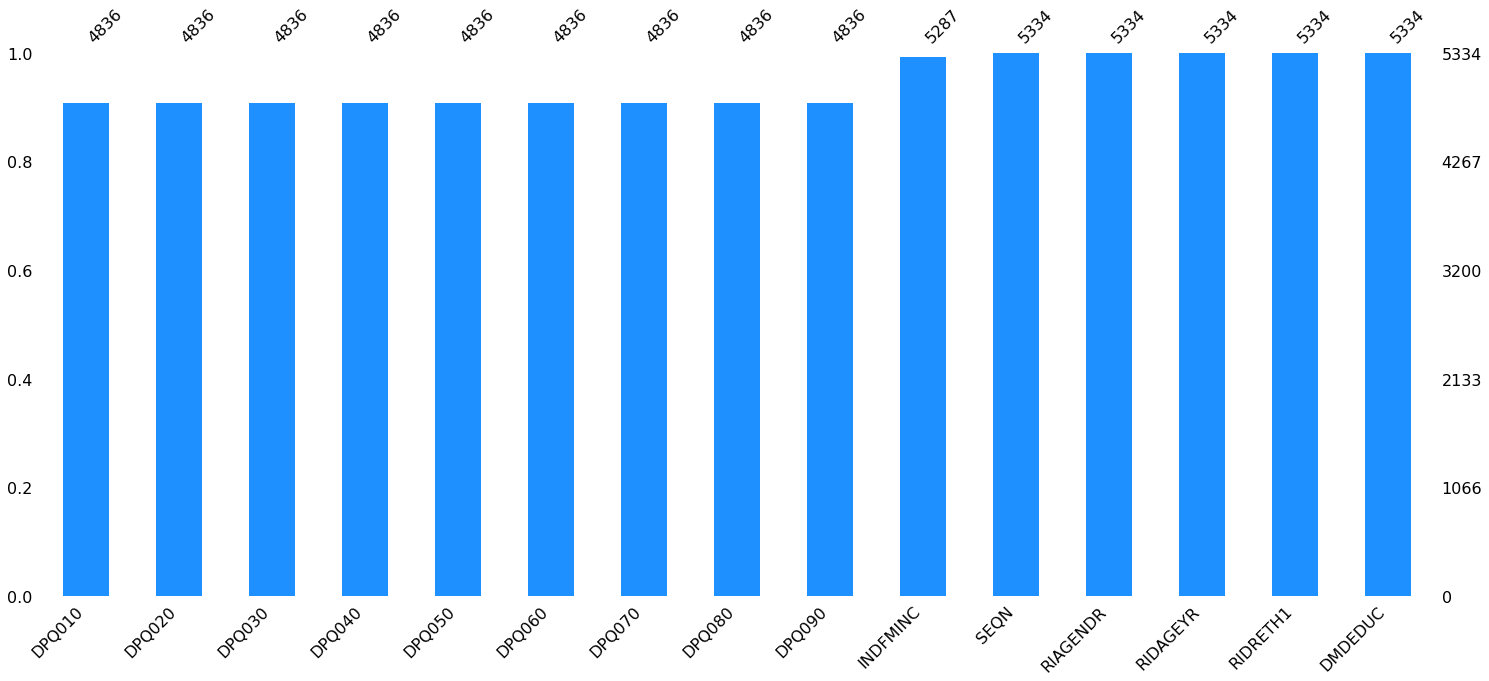

In [15]:
#outra forma de visualizar os dados faltantes com o missingno
msno.bar(df_phq,color="dodgerblue", sort="ascending")

<AxesSubplot:>

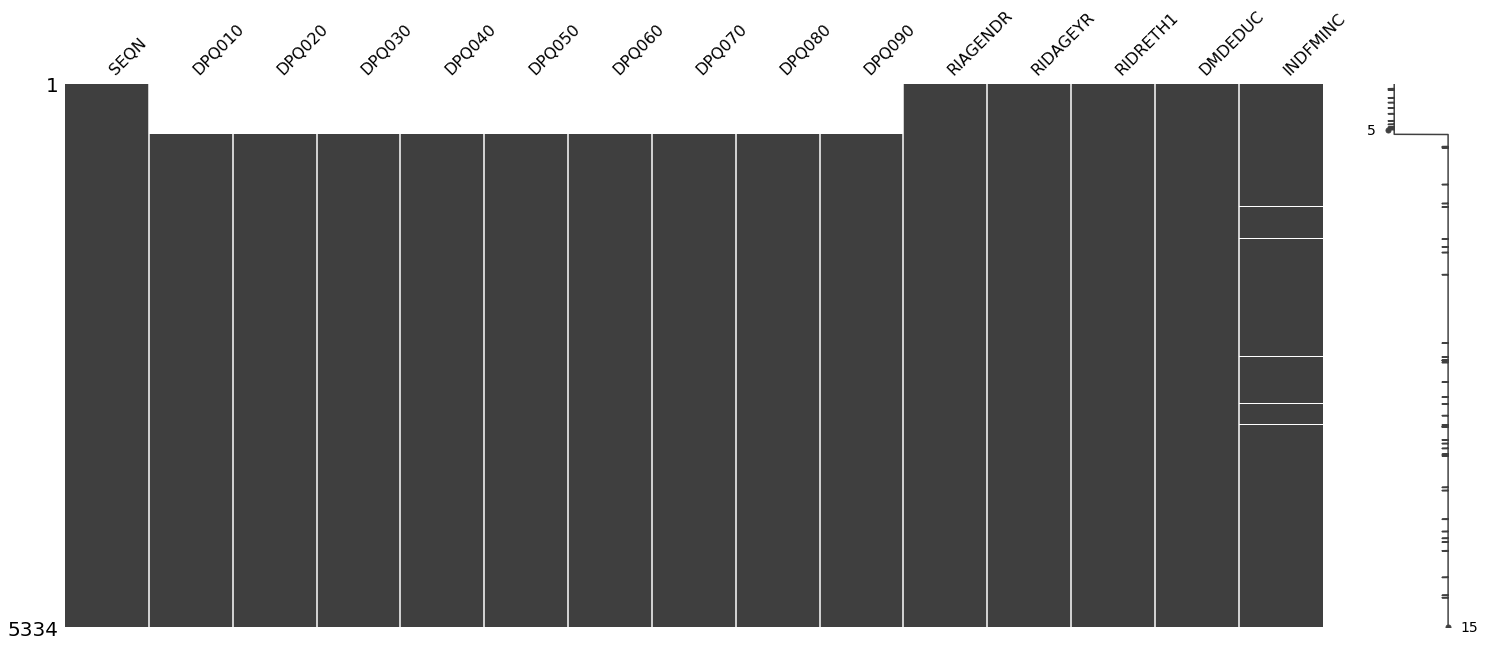

In [17]:
#utilizando o missingo para ter idéia da localização dos dados faltantes
#utilizando a função sort_values na coluna DPQ010
df_phq_missing = df_phq.sort_values(by = 'DPQ010' , na_position='first')
msno.matrix(df_phq_missing)

Analisando o resultado acima, vemos que os 498 dados faltantes das colunas DPQ010 até a DPQ090 estão no mesmo participante, por esta razão irei retirá-los do dataset. Apesar de serem apenas 47 observações faltantes na coluna INDFMINC, analisaremos estes dados para tentar inferir alguma conclusão.